<center>
    <h1>Phân tích dữ liệu lưu trữ hồ sơ sức khỏe của các bệnh nhân khám bệnh đau tim, được thu thập từ các phòng khám chuyên khoa</h1>
</center>

---

**Mô tả dữ liệu**

Mỗi một bệnh nhân bao gồm 9 thông tin:
1. id: Mã của bệnh nhân (object)
2. Age: Tuổi của bệnh nhân (số)
3. Gender: Giới tính của bệnh nhân (chuỗi: Male –Female)
4. Type: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical 
angina, Atypical angina, Non-anginal pain, Asymptomatic)
5. Blood_pressure: Huyết áp của bệnh nhân –đơn vị: mmhg (số)
6. Cholesterol: Chỉ số cholesterol của bệnh nhân –đơn vị: mg/dl (số)
7. Heatbeat: Thông số nhịp tim của bệnh nhân –đơn vị: lần/phút (số)
8. Thalassemia: Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 6: Khiếm 
khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)
9. Result: Cho biết bệnh nhân có bị bệnh tim hay không? (No: Không bị bệnh tim mạch | Yes: Bị 
bệnh tim mạch

In [51]:
#Gọi thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Đọc và kiểm tra dữ liệu

In [52]:
#Đọc dữ liệu
data_raw = pd.read_excel('Data/Data_Patient_Heart_Attack.xlsx')
#Hiển thị thông tin dữ liệu
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              302 non-null    object
 1   Age             302 non-null    int64 
 2   Gender          302 non-null    object
 3   Type            297 non-null    object
 4   Blood_pressure  302 non-null    int64 
 5   Cholesterol     302 non-null    int64 
 6   Heartbeat       302 non-null    int64 
 7   Thalassemia     302 non-null    object
 8   Result          302 non-null    object
dtypes: int64(4), object(5)
memory usage: 21.4+ KB


In [53]:
#Hiển thị 5 dòng đầu của dữ liệu
data_raw.head()

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,Patient_01,63,Male,Typical angina,145,233,150,6,No
1,Patient_02,67,Male,Asymptomatic,160,286,108,Three,Yes
2,Patient_03,67,Male,Asymptomatic,120,229,129,7,Yes
3,Patient_04,37,Male,Non-anginal pain,130,250,187,Three,No
4,Patient_05,41,F,Atypical angina,130,204,172,6,No


In [54]:
#Hiển thị 5 dòng cuối của dữ liệu
data_raw.tail()

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
297,Patient_296,59,Male,Asymptomatic,164,176,90,6,Yes
298,Patient_297,57,Female,Asymptomatic,140,241,123,7,Yes
299,Patient_298,45,Male,Typical angina,110,264,132,7,Yes
300,Patient_299,68,Male,Asymptomatic,144,193,141,7,Yes
301,Patient_300,57,Male,Asymptomatic,130,131,115,7,Yes


In [55]:
#Hiển thị ngẫu nhiên 5 dòng của dữ liệu
data_raw.sample(5)

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
29,Patient_30,40,Male,Asymptomatic,110,167,114,7,Yes
143,Patient_142,52,Male,Atypical angina,128,205,184,Three,No
73,Patient_72,67,Male,Asymptomatic,125,254,163,7,Yes
226,Patient_225,34,Female,Atypical angina,118,210,192,Three,No
40,Patient_41,65,Female,Asymptomatic,150,225,114,7,Yes


In [56]:
#Hiển thị đặc trung dữ liệu kiểu object
data_raw.describe(include='O')

,id,Gender,Type,Thalassemia,Result
count,302,302,297,302,302
unique,292,4,4,3,2
top,Patient_60,Male,Asymptomatic,Three,No
freq,3,205,139,160,164


In [57]:
#Hiển thị đặc trung dữ liệu còn lại
data_raw.describe()

,Age,Blood_pressure,Cholesterol,Heartbeat
count,302.000000,302.000000,302.000000,302.000000
mean,56.582781,131.642384,246.844371,148.870861
std,38.773361,17.632025,51.736737,24.386694
min,29.000000,94.000000,126.000000,0.000000
25%,48.000000,120.000000,211.250000,132.250000
50%,55.500000,130.000000,241.500000,152.000000
75%,61.000000,140.000000,275.000000,165.000000
max,710.000000,200.000000,564.000000,202.000000


### Một số điểm bất thường: 
- Dữ liệu có 302 hồ sơ bệnh nhân trong đấy có 5 hồ sơ thiếu dữ liệu thuộc tính Type
- Dữ liệu thuộc tính Thalassemia chưa đúng định dạng (dạng chuỗi)
- Thuộc tính Gender có tới 4 giá trị -> chưa được chuẩn hoá
- Max thuộc tính Age = 710, min thuộc tính Heartbeat = 0 -> bất thường


## 2. Xây dựng luồng công việc

**A. Chuẩn hoá dữ liệu**
1. Chuẩn hoá cột Gender:
    - Chuyển dữ liệu thành thể thống nhất và dưới dạng số:
        Chuyển F, Female thành 0, M, Male thành 1
2. Chuẩn hoá cột Thalassemia:
    - Chuyển Three thành 3
3. Chuẩn hoá cột Result:
    - Chuyển No thành 0
    - Chuyển Yes thành 1
4. Chuẩn hoá cột Type:
    - Chuẩn hoá dữ liệu thành dạng số

**B. Kiểm tra và xử lý dữ liệu thiếu (nếu có)**
- Xử lí missing ở thuộc tính Type

**C. Kiểm tra và xử lý dữ trùng lặp (nếu có)**

**D. Kiểm tra và xử lý dữ liệu ngoại lai (nếu có):**
- Xử lý giá trị ngoại lai ở thuộc tính Age và Heartbeat

## 3. Thực hiện luồng

In [58]:
#Tạo bản sao dữ liệu
data_clean = data_raw.copy()

In [59]:
#Xoá các cột không cần thiết
data_clean.drop(['id'], axis=1, inplace=True)

In [60]:
#Hiển thị 5 dòng đầu của dữ liệu
data_clean.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,63,Male,Typical angina,145,233,150,6,No
1,67,Male,Asymptomatic,160,286,108,Three,Yes
2,67,Male,Asymptomatic,120,229,129,7,Yes
3,37,Male,Non-anginal pain,130,250,187,Three,No
4,41,F,Atypical angina,130,204,172,6,No


## A. Chuẩn hoá dữ liệu
### 1. Chuẩn hoá cột Gender:

In [61]:
#Kiểm tra các giá trị của Gender
data_clean['Gender'].unique()

array(['Male', 'F', 'Female', 'M'], dtype=object)

In [62]:
#Thay thế  F, Female thành 0 và M, Male thành 1
cover_gender = {'F': 0,
                'Female': 0,
                'M': 1,
                'Male': 1}
#Chuyển đổi
data_clean['Gender']  = data_clean['Gender'].map(cover_gender).astype('int16')
#Hiển thị kết quả
data_clean['Gender'].unique()

array([1, 0], dtype=int16)

### 2. Chuẩn hoá cột Thalassemia:

In [63]:
#Kiểm tra các giá trị của Thalassemia
data_clean['Thalassemia'].unique()

array([6, 'Three', 7], dtype=object)

In [64]:
#Thay thế Three thành 3
data_clean['Thalassemia']  = data_clean['Thalassemia'].replace('Three',3).astype('int16')
#Hiển thị kết quả
data_clean['Thalassemia'].unique()

array([6, 3, 7], dtype=int16)

In [65]:
data_clean.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
0,63,1,Typical angina,145,233,150,6,No
1,67,1,Asymptomatic,160,286,108,3,Yes
2,67,1,Asymptomatic,120,229,129,7,Yes
3,37,1,Non-anginal pain,130,250,187,3,No
4,41,0,Atypical angina,130,204,172,6,No


### 3. Chuẩn hoá cột Result:

In [66]:
#Kiểm tra các giá trị của Result
data_clean['Result'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
#Chuyển đổi Yes thành 1 và No thành 0
cover_result = {'Yes': 1,
                'No': 0}
#Chuyển đổi
data_clean['Result']  = data_clean['Result'].map(cover_result).astype('int16')
#Hiển thị kết quả
data_clean['Result'].unique()

array([0, 1], dtype=int16)

### 4. Chuẩn hoá cột Type:

In [68]:
#Kiểm tra các giá trị của Type
data_clean['Type'].unique()

array(['Typical angina', 'Asymptomatic', 'Non-anginal pain',
       'Atypical angina', nan], dtype=object)

**Nhận xét: Do có giá trị missing nên ta cần xử lý missing trước khi chuẩn hoá**

## B. Kiểm tra và xử lý dữ liệu thiếu
### Xử lý thuộc tính Type

In [69]:
#Hiển thị các giá trị missing
data_clean[data_clean['Type'].isnull()]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
207,58,1,NaN,128,259,130,7,1
220,59,1,NaN,138,271,182,3,0
252,58,1,NaN,146,218,105,7,1
272,66,1,NaN,160,228,138,6,0
294,63,1,NaN,140,187,144,7,1


In [70]:
#Thống kê số lượng giá trị của Type
data_clean['Type'].value_counts()

Type
Asymptomatic        139
Non-anginal pain     84
Atypical angina      49
Typical angina       25
Name: count, dtype: int64

In [71]:
#Thống kê tỷ lệ giá trị của Type
type_pie = data_clean['Type'].value_counts(normalize=True)
type_pie

Type
Asymptomatic        0.468013
Non-anginal pain    0.282828
Atypical angina     0.164983
Typical angina      0.084175
Name: proportion, dtype: float64

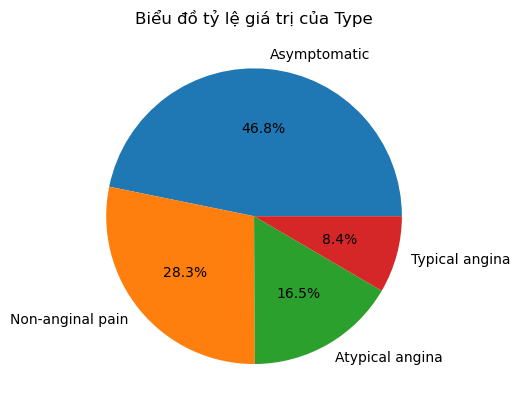

In [72]:
#Vẽ biểu đồ thể hiện tỷ lệ giá trị của Type
plt.pie(type_pie, labels=type_pie.index, autopct='%.1f%%')
plt.title('Biểu đồ tỷ lệ giá trị của Type')
plt.show()

Trong 4 giá trị Typical angina, Asymptomatic, Non-anginal pain, Atypical angina:
- Asymptomatic: xuất hiện nhiều nhất 139 lần chiếm ~46,8%
- Non-anginal pain: xuất hiện 84 lần chiếm ~28,3%
- Atypical angina: xuất hiện 49 lần chiếm ~16,5%
- Typical angina: xuất hiện 25 lần chiếm ~8,4%

->Xử lý thuộc tính Type bằng giá trị xuất hiện nhiều nhất đó là Asymptomatic

In [73]:
#Thay thế missing bằng giá trị xuất hiện nhiều nhất:
data_clean['Type'] = data_clean['Type'].fillna('Asymptomatic')

In [74]:
#Kiểm tra các bản ghi còn missing
data_clean.isnull().sum()

Age               0
Gender            0
Type              0
Blood_pressure    0
Cholesterol       0
Heartbeat         0
Thalassemia       0
Result            0
dtype: int64

#### Tiến hành chuẩn hoá thành dạng số đối với thuộc tính Type:
- Typical angina = 0 
- Asymptomatic = 1
- Non-anginal pain = 2
- Atypical angina = 3

In [75]:
#Thay thế  Typical angina = 0 ,  Asymptomatic = 1,  Non-anginal pain = 2, Atypical angina = 3 ở thuộc tính Type
cover_type = {'Typical angina': 0,
              'Asymptomatic': 1,
              'Non-anginal pain': 2,
              'Atypical angina': 3}
#Chuyển đổi
data_clean['Type']  = data_clean['Type'].map(cover_type).astype('int16')
#Hiển thị kết quả
data_clean['Type'].unique()

array([0, 1, 2, 3], dtype=int16)

In [76]:
#Hiển thị dữ liệu sau khi chuẩn hoá
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             302 non-null    int64
 1   Gender          302 non-null    int16
 2   Type            302 non-null    int16
 3   Blood_pressure  302 non-null    int64
 4   Cholesterol     302 non-null    int64
 5   Heartbeat       302 non-null    int64
 6   Thalassemia     302 non-null    int16
 7   Result          302 non-null    int16
dtypes: int16(4), int64(4)
memory usage: 11.9 KB


## C. Kiểm tra và xử lý dữ trùng lặp

In [77]:
#Kiểu tra dữ liệu trùng lặp
data_clean[data_clean.duplicated(keep=False)]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
59,51,1,0,125,213,125,3,0
60,51,1,0,125,213,125,3,0
61,51,1,0,125,213,125,3,0


In [78]:
#Tiến hành xoá dữ liệu trùng lặp chỉ giữ lại dòng đầu tiên
data_clean = data_clean.drop_duplicates(keep='first')

In [79]:
#Kiểm tra trùng lặp sau khi xoá
data_clean.duplicated(keep=False).sum()

0

## D. Kiểm tra và xử lý dữ liệu ngoại lai

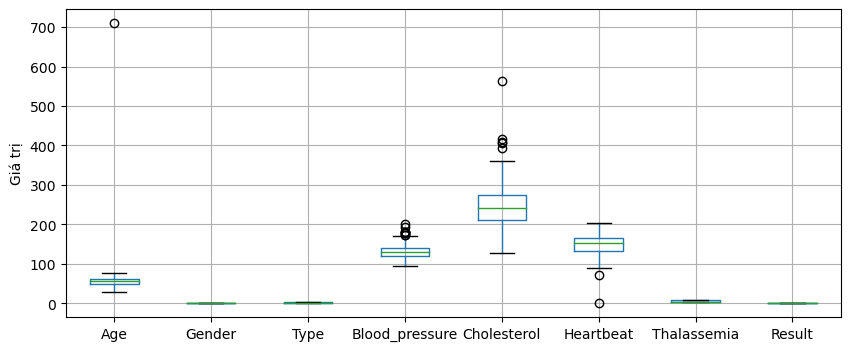

In [80]:
#Kiểm tra giá trị ngoại lai của data
plt.figure(figsize=(10,4))
data_clean.boxplot()
plt.ylabel('Giá trị')
plt.show()

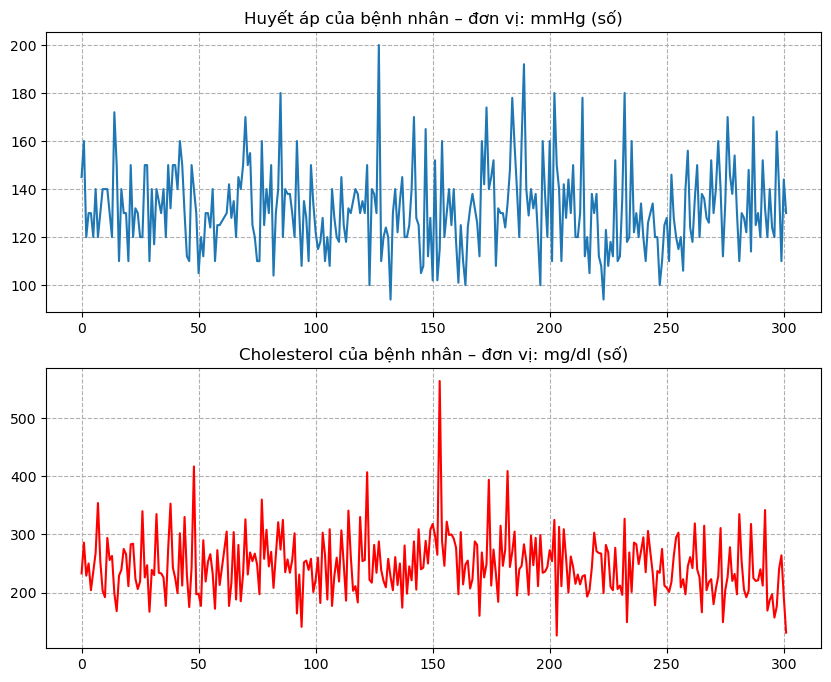

In [81]:
#Kiểm tra các thuộc tính Blood_pressure, Cholesterol
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title('Huyết áp của bệnh nhân – đơn vị: mmHg (số)')
plt.plot(data_clean.index,data_clean['Blood_pressure'])
plt.grid(ls='--')

plt.subplot(2,1,2)
plt.title('Cholesterol của bệnh nhân – đơn vị: mg/dl (số)')
plt.plot(data_clean.index,data_clean['Cholesterol'], color='red')
plt.grid(ls='--')
plt.show()


In [82]:
#Kiểm tra Cholesterol > 500
data_clean[data_clean['Cholesterol'] > 500]
#->Tuy nhiên, giá trị này không phải là giá trị ngoại lai

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
153,67,0,2,115,564,160,7,0


**==> Ta thấy 2 giá trị bất thường ở thuộc tính Age, Heartbeat**

### Age

In [83]:
#Kiểm tra giá trị ngoại lai của Age
data_clean['Age'].describe()

count    300.000000
mean      56.620000
std       38.900124
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max      710.000000
Name: Age, dtype: float64

In [84]:
#Kiểm tra giá trị ngoại lai của Age
data_clean[data_clean['Age']>100]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
42,710,0,3,160,302,162,3,0


In [85]:
#Thay thế giá trị ngoại lai của Age
data_clean['Age'].loc[42] = 71

In [86]:
#Kiểm tra giá trị ngoại lai của Age
data_clean['Age'].describe()

count    300.000000
mean      54.490000
std        9.032267
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

### Heartbeat

In [87]:
#Kiểm tra giá trị ngoại lai của Heartbeat
data_clean['Heartbeat'].describe()

count    300.000000
mean     149.030000
std       24.389587
min        0.000000
25%      133.000000
50%      152.000000
75%      165.250000
max      202.000000
Name: Heartbeat, dtype: float64

In [88]:
#Kiểm tra nhịp tim dưới 50
data_clean[data_clean['Heartbeat']<50]

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
6,62,0,1,140,268,0,3,1


In [89]:
# Lọc dữ liệu với Result bằng 1
result_1 = data_clean[data_clean['Result'] == 1]

# Tính giá trị trung bình nhịp tim những người bị đau tim (Result = 1)
mean_values = result_1['Heartbeat'].mean()
print('Giá trị trung bình của Heartbeat của người bị bệnh',mean_values)

Giá trị trung bình của Heartbeat của người bị bệnh 137.84782608695653


In [90]:
#Thay giá trị ngoại lai của Heartbeat bằng giá trị trung bình người bị bệnh
data_clean['Heartbeat'].loc[6] = mean_values
#Chuyển dữ liệu thành int16
data_clean['Heartbeat'] = data_clean['Heartbeat'].astype('int16')

## 4.Kiểm tra, xác thực

In [91]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             300 non-null    int64
 1   Gender          300 non-null    int16
 2   Type            300 non-null    int16
 3   Blood_pressure  300 non-null    int64
 4   Cholesterol     300 non-null    int64
 5   Heartbeat       300 non-null    int16
 6   Thalassemia     300 non-null    int16
 7   Result          300 non-null    int16
dtypes: int16(5), int64(3)
memory usage: 20.4 KB


In [92]:
#Thống kê các đặc trưng
data_clean.describe()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia,Result
count,300.000000,300.000000,300.0000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,54.490000,0.683333,1.5300,131.686667,247.070000,149.486667,4.810000,0.46000
std,9.032267,0.465953,0.8553,17.682498,51.835136,22.822050,1.930368,0.49923
min,29.000000,0.000000,0.0000,94.000000,126.000000,71.000000,3.000000,0.00000
25%,48.000000,0.000000,1.0000,120.000000,211.000000,133.750000,3.000000,0.00000
50%,56.000000,1.000000,1.0000,130.000000,242.500000,152.000000,3.000000,0.00000
75%,61.000000,1.000000,2.0000,140.000000,275.250000,165.250000,7.000000,1.00000
max,77.000000,1.000000,3.0000,200.000000,564.000000,202.000000,7.000000,1.00000


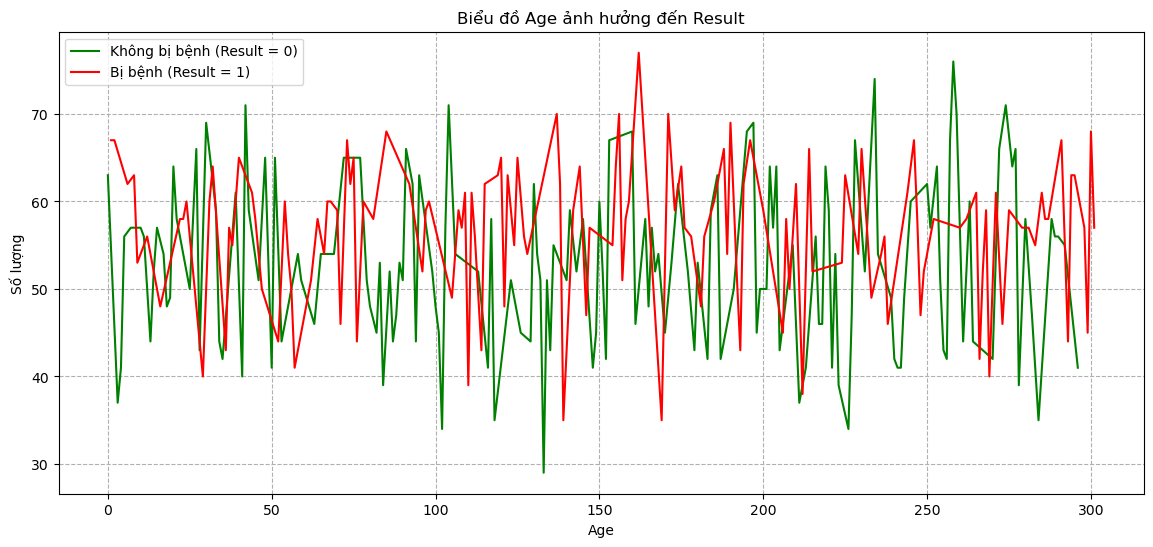

In [93]:
#1. TRỰC QUAN HÓA DỮ LIỆU AGE ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(14,6))
plt.plot(data_clean[data_clean['Result'] == 0]['Age'], label='Không bị bệnh (Result = 0)',color='green')
plt.plot(data_clean[data_clean['Result'] == 1]['Age'], label='Bị bệnh (Result = 1)', color='red')
plt.title('Biểu đồ Age ảnh hưởng đến Result')
plt.xlabel('Age')
plt.ylabel('Số lượng')
plt.grid(ls='--')
plt.legend()

plt.show()

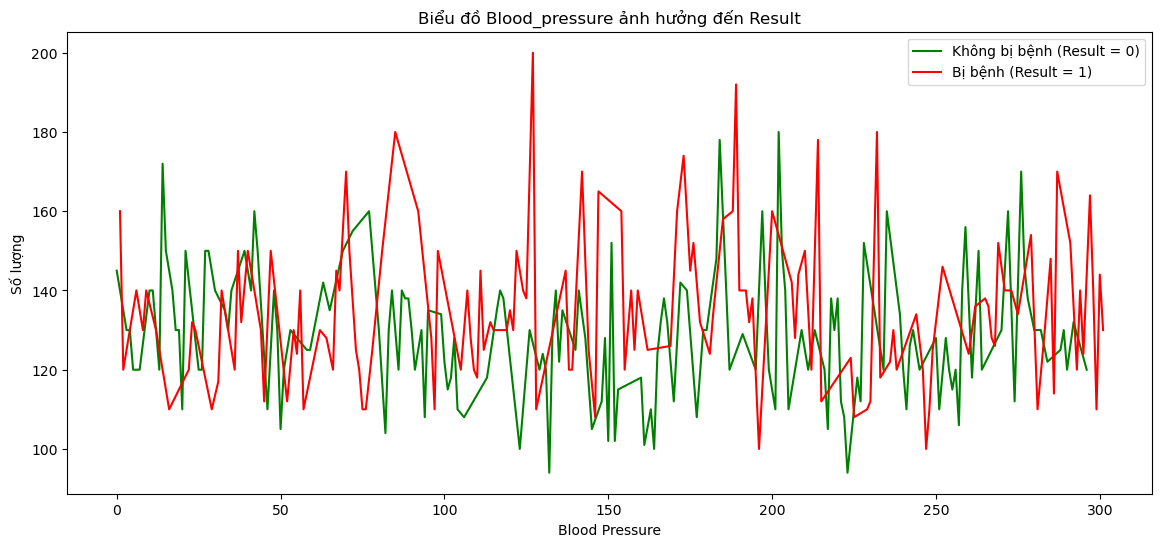

In [94]:
#2. TRỰC QUAN HÓA DỮ LIỆU Blood_pressure ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(14,6))
plt.plot(data_clean[data_clean['Result'] == 0]['Blood_pressure'], label='Không bị bệnh (Result = 0)', color='green')
plt.plot(data_clean[data_clean['Result'] == 1]['Blood_pressure'], label='Bị bệnh (Result = 1)', color='red')
plt.title('Biểu đồ Blood_pressure ảnh hưởng đến Result')
plt.xlabel('Blood Pressure')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

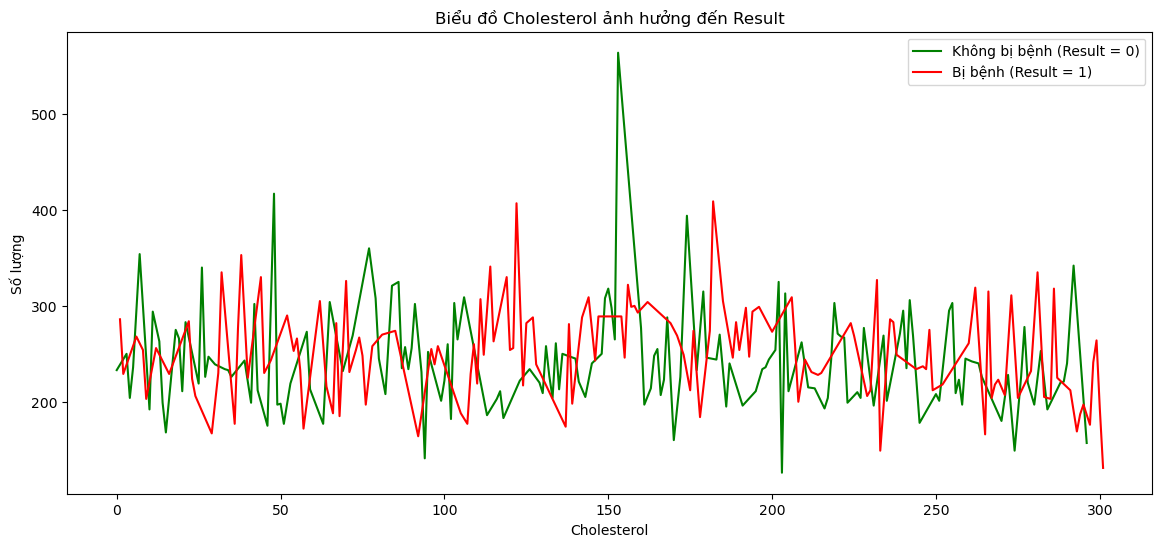

In [95]:
#3. TRỰC QUAN HÓA DỮ LIỆU Cholesterol ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(14,6))
plt.plot(data_clean[data_clean['Result'] == 0]['Cholesterol'], label='Không bị bệnh (Result = 0)', color='green')
plt.plot(data_clean[data_clean['Result'] == 1]['Cholesterol'], label='Bị bệnh (Result = 1)', color='red')
plt.title('Biểu đồ Cholesterol ảnh hưởng đến Result')
plt.xlabel('Cholesterol')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

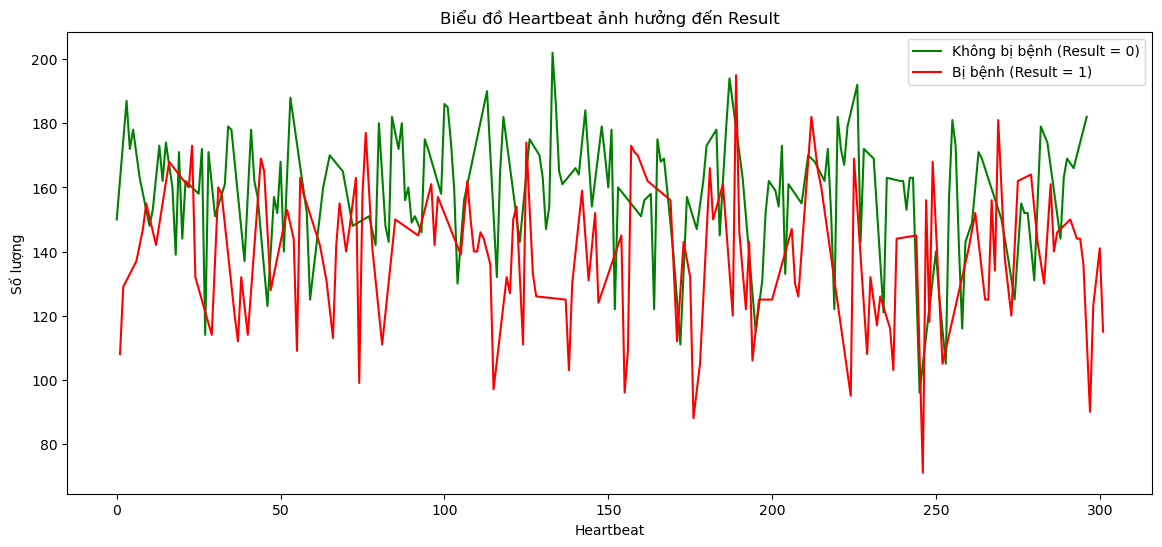

In [96]:
#4. TRỰC QUAN HÓA DỮ LIỆU Heartbeat ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(14,6))
plt.plot(data_clean[data_clean['Result'] == 0]['Heartbeat'], label='Không bị bệnh (Result = 0)', color='green')
plt.plot(data_clean[data_clean['Result'] == 1]['Heartbeat'], label='Bị bệnh (Result = 1)', color='red')
plt.title('Biểu đồ Heartbeat ảnh hưởng đến Result')
plt.xlabel('Heartbeat')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

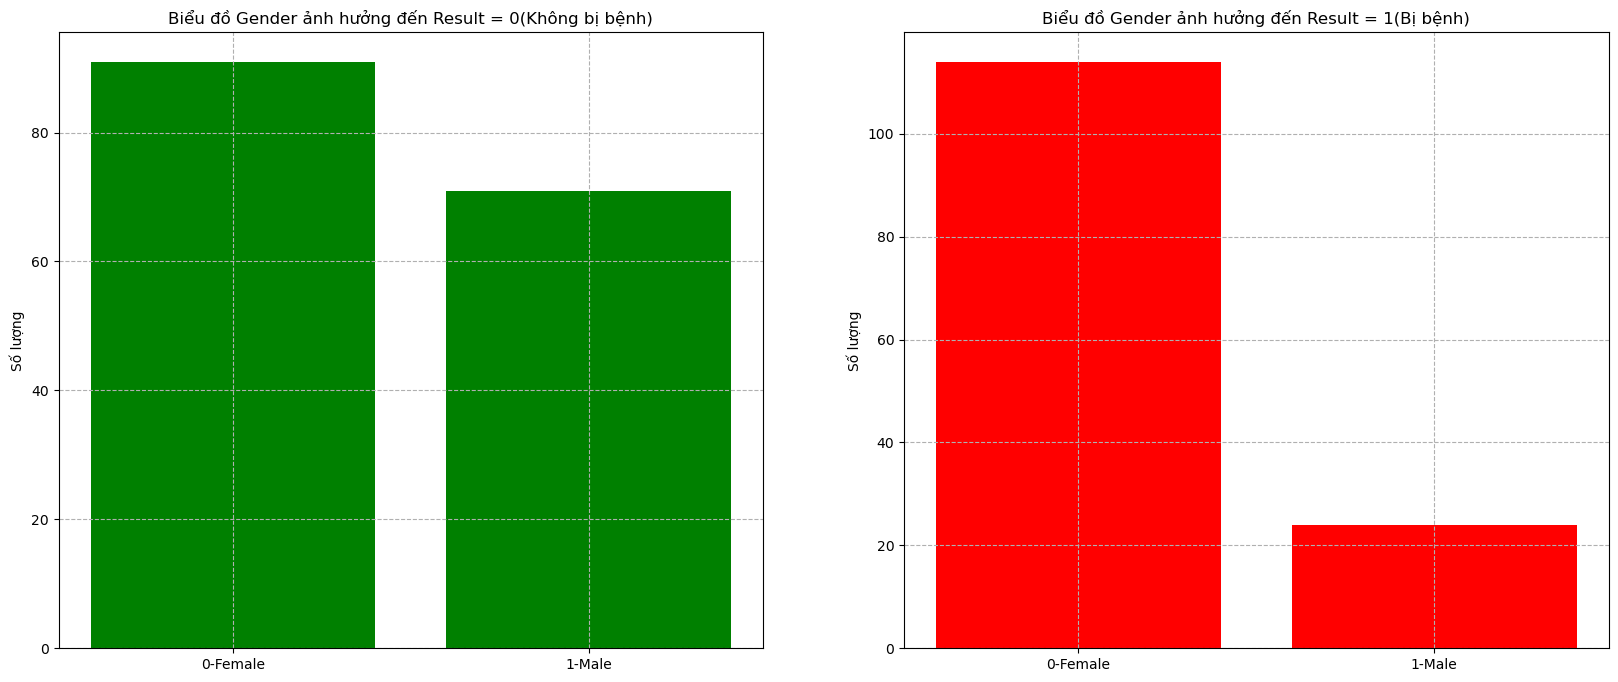

In [97]:
#5. TRỰC QUAN HÓA DỮ LIỆU Gender ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(20,8))
#Giới tính của người không bị bệnh
Gender_0 = data_clean[data_clean['Result'] == 0]['Gender'].value_counts()
#Giới tính của người bị bệnh
Gender_1 = data_clean[data_clean['Result'] == 1]['Gender'].value_counts()
plt.subplot(1,2,1)
plt.title('Biểu đồ Gender ảnh hưởng đến Result = 0(Không bị bệnh)')
plt.bar(['0-Female','1-Male'], Gender_0.values,color='green')
plt.ylabel('Số lượng')
plt.grid(ls='--')
plt.subplot(1,2,2)
plt.title('Biểu đồ Gender ảnh hưởng đến Result = 1(Bị bệnh)')
plt.bar(['0-Female','1-Male'], Gender_1.values,color='red')
plt.ylabel('Số lượng')
plt.grid(ls='--')
plt.show()

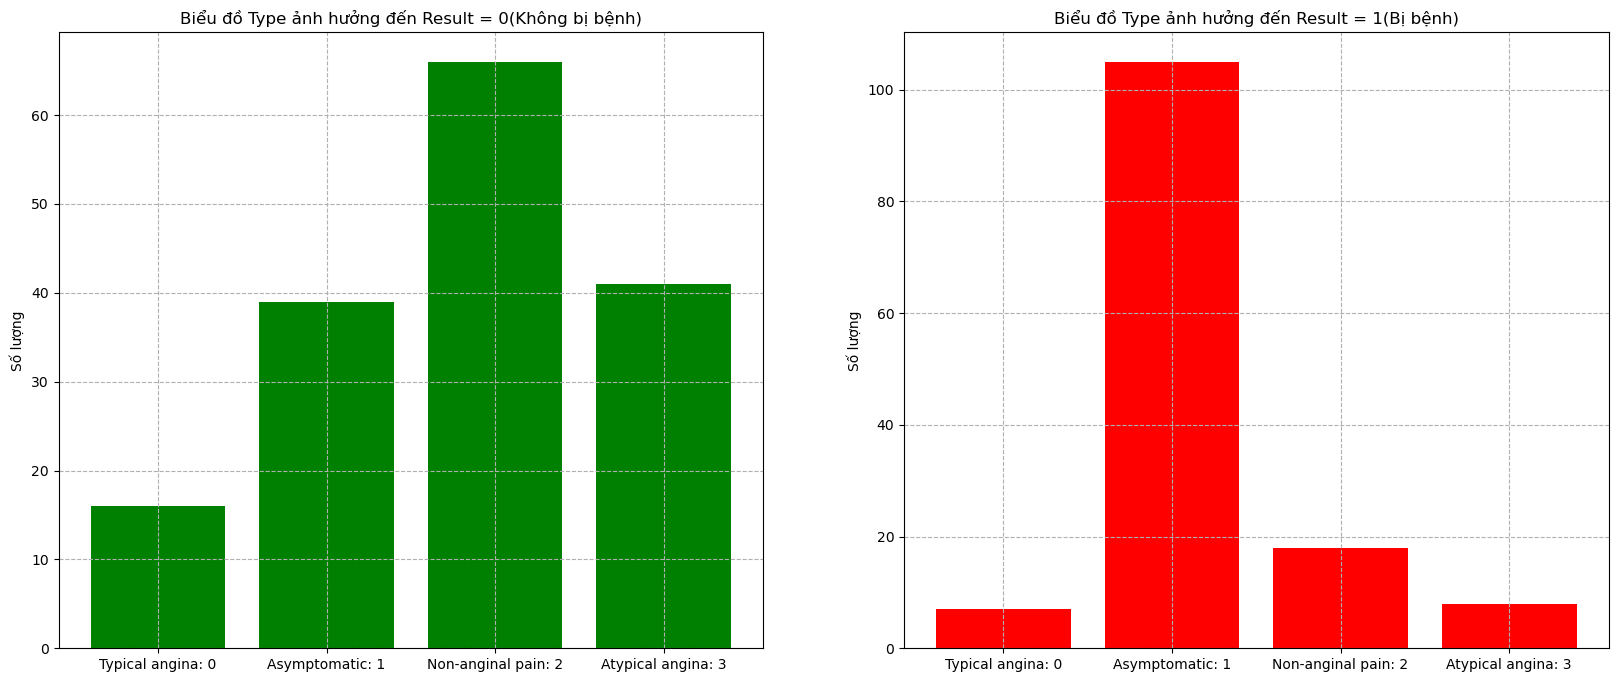

In [98]:
#6. TRỰC QUAN HÓA DỮ LIỆU Type ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(20,8))
labels = ['Typical angina: 0', 'Asymptomatic: 1', 'Non-anginal pain: 2', 'Atypical angina: 3']
#Triệu chứng đau ngực của người không bị bệnh
Type_0 = data_clean[data_clean['Result'] == 0]['Type'].value_counts()
#Thay đổi lại vị trí index
Type_0 = Type_0.reindex([0, 1, 2, 3])
#Triệu chứng đau ngực của người bị bệnh
Type_1 = data_clean[data_clean['Result'] == 1]['Type'].value_counts()
#Thay đổi lại vị trí index
Type_1 = Type_1.reindex([0, 1, 2, 3])
#Hiển thị biểu đồ
#Không bị bệnh
plt.subplot(1,2,1)
plt.title('Biểu đồ Type ảnh hưởng đến Result = 0(Không bị bệnh)')
plt.bar(labels, Type_0.values,color='green')
plt.ylabel('Số lượng')
plt.grid(ls='--')
#Bị bệnh
plt.subplot(1,2,2)
plt.title('Biểu đồ Type ảnh hưởng đến Result = 1(Bị bệnh)')
plt.bar(labels, Type_1.values,color='red')
plt.ylabel('Số lượng')
plt.grid(ls='--')

plt.show()

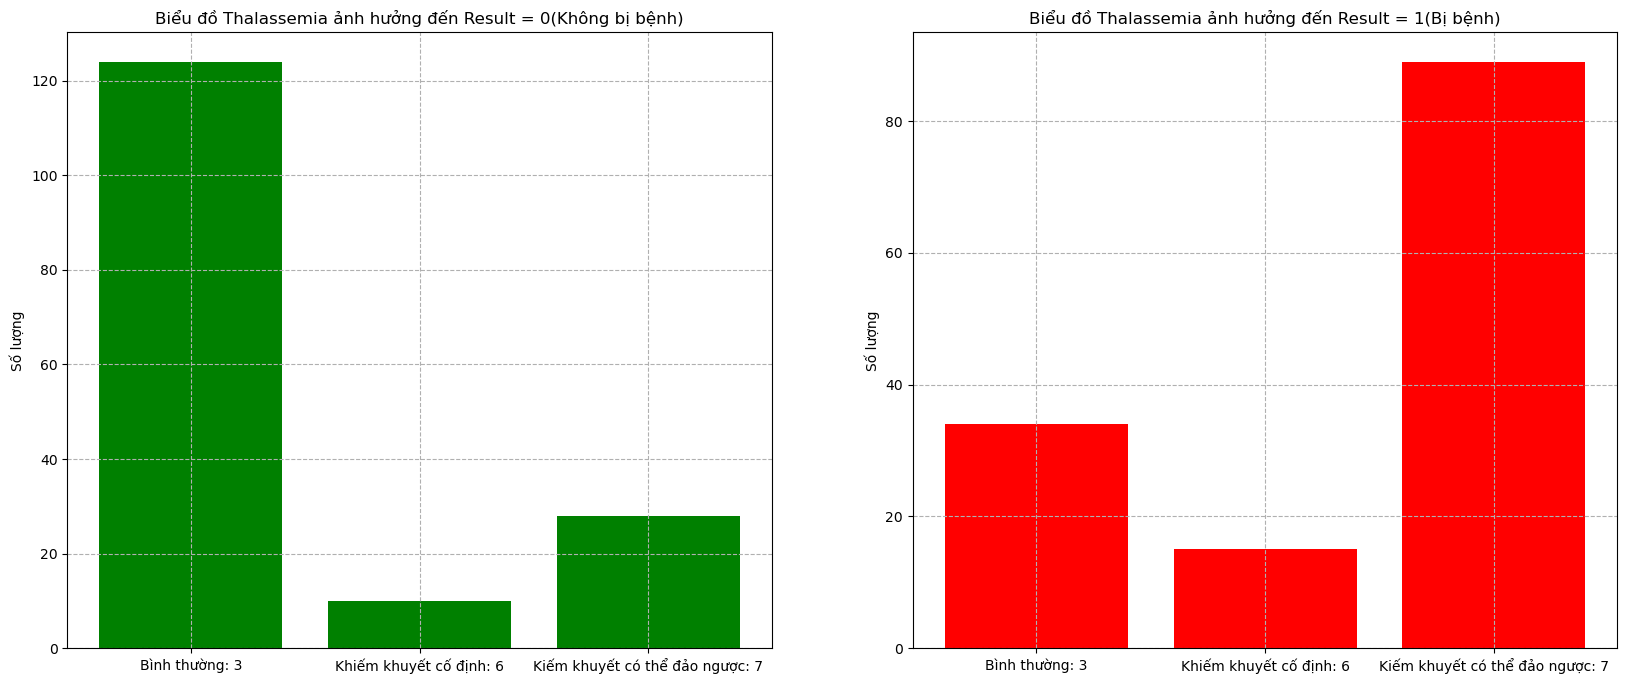

In [99]:
#7. TRỰC QUAN HÓA DỮ LIỆU Thalassemia ẢNH HƯỞNG ĐẾN KHẢ NĂNG BỊ BỆNH
plt.figure(figsize=(20,8))
labels = ['Bình thường: 3', 'Khiếm khuyết cố định: 6', 'Kiếm khuyết có thể đảo ngược: 7']
#Chỉ số Thalassemia của người không bị bệnh
Thalassemia_0 = data_clean[data_clean['Result'] == 0]['Thalassemia'].value_counts()
#Thay đổi lại vị trí index
Thalassemia_0 = Thalassemia_0.reindex([3,6,7])
#Chỉ số Thalassemia của người bị bệnh
Thalassemia_1 = data_clean[data_clean['Result'] == 1]['Thalassemia'].value_counts()
#Thay đổi lại vị trí index
Thalassemia_1 = Thalassemia_1.reindex([3,6,7])
#Hiển thị biểu đồ
#Không bị bệnh
plt.subplot(1,2,1)
plt.title('Biểu đồ Thalassemia ảnh hưởng đến Result = 0(Không bị bệnh)')
plt.bar(labels, Thalassemia_0.values,color='green')
plt.ylabel('Số lượng')
plt.grid(ls='--')
#Bị bệnh
plt.subplot(1,2,2)
plt.title('Biểu đồ Thalassemia ảnh hưởng đến Result = 1(Bị bệnh)')
plt.bar(labels, Thalassemia_1.values,color='red')
plt.ylabel('Số lượng')
plt.grid(ls='--')

plt.show()

## Lưu dữ liệu đã làm sạch

### Giải thích dữ liệu:
1. Age: Tuổi của bệnh nhân
2. Gender: Giới tính của bệnh nhân có 2 giá trị 0-Famele, 1-Male
3. Type: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: Typical angina: 0, Asymptomatic: 1, Non-anginal pain: 2, Atypical angina: 3
4. Blood_pressure: Huyết áp của bệnh nhân – đơn vị: mmhg
5. Cholesterol: Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl
6. Heartbeat: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút
7. Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 6: Khiếm 
khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)
8. Result: Cho biết bệnh nhân có bị bệnh tim hay không? (0-Không bị bệnh tim mạch|1-Bị bệnh tim mạch)

In [100]:
#Lưu dữ liệu thô đã được xử lý ra file Excel
data_clean.to_excel('Data/Data_Patient_OK.xlsx', index=False)